In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os


In [ ]:
#tes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd 
rating = pd.read_csv("/content/gdrive/My Drive/bangkit/01.csv")
rating.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
rating.shape

(34660, 21)

In [ ]:
#Filtering Columns
rating=rating[['reviews.rating' , 'reviews.text' , 'reviews.title']]

In [ ]:
rating.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
 2   reviews.title   34655 non-null  object 
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


In [ ]:
#Checking for null values
print(rating.isnull().sum())

reviews.rating    33
reviews.text       1
reviews.title      5
dtype: int64


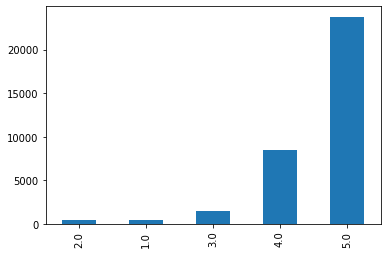

In [ ]:
#ploting graph on the basis of review ratings
rating["reviews.rating"].value_counts().sort_values().plot.bar()

In [ ]:
#Rating value counts
#shows maximum reviews are positive.
rating['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [ ]:
review=pd.DataFrame(rating.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [ ]:
rating = rating[['reviews.rating' , 'reviews.text' , 'reviews.title']]
rating_=rating.dropna()
rating_.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [ ]:
check =  rating_[rating_["reviews.text"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title


**PREPROCESSING**

**Elimination**




In [ ]:
actualrating = rating[(rating['reviews.rating'] == 1) | (rating['reviews.rating'] == 5)]
actualrating.shape

(24185, 3)

In [ ]:
y = actualrating['reviews.rating']
x = actualrating['reviews.text'].reset_index()
# X =x[xindex(False)]

In [ ]:
X = x['reviews.text']
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
                               ...                        
24180    This is exactly like any other usb power charg...
24181    Amazon should include this charger with the Ki...
24182    Love my Kindle Fire but I am really disappoint...
24183    I was surprised to find it did not come with a...
24184    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 24185, dtype: object


In [ ]:
print(len(X))

24185


In [ ]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [ ]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']
